In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/model_save/mobilenetv2_best_val_loss1126.h5')

2021-11-27 10:07:41.239168: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-27 10:07:41.247414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-11-27 10:07:41.248607: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-27 10:07:41.249544: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

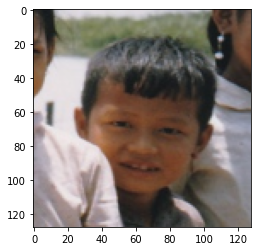

In [65]:
img = cv2.imread('/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/100212.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128,128))
plt.imshow(img)

In [98]:
pwd

'/root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2'

In [107]:
%cd ..

/root/kickboard_helmet_project/SERVER/train_model


In [108]:
!git clone https://github.com/StanislasBertrand/RetinaFace-tf2.git

Cloning into 'RetinaFace-tf2'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 344 (delta 136), reused 314 (delta 115), pack-reused 0
Receiving objects: 100% (344/344), 4.77 MiB | 0 bytes/s, done.
Resolving deltas: 100% (136/136), done.


In [109]:
%cd ./RetinaFace-tf2
!pip install -r requirements.txt
!pip3 install wget
!make

/root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2
cd src/retinafacetf2/rcnn/cython/; python setup.py build_ext --inplace; rm -rf build; cd ../../
running build_ext
cythoning bbox.pyx to bbox.c
/root/anaconda3/envs/team_env/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2/src/retinafacetf2/rcnn/cython/bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
cythoning anchors.pyx to anchors.c
/root/anaconda3/envs/team_env/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2/src/retinafacetf2/rcnn/cython/anchors.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
cythoning cpu_nms.py

In [112]:
import sys
sys.path.append('kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2/src/retinafacetf2')

In [118]:
sys.path.append('/root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2')

In [119]:
sys.path

['/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2',
 '/root/anaconda3/envs/team_env/lib/python37.zip',
 '/root/anaconda3/envs/team_env/lib/python3.7',
 '/root/anaconda3/envs/team_env/lib/python3.7/lib-dynload',
 '',
 '/root/anaconda3/envs/team_env/lib/python3.7/site-packages',
 '/root/anaconda3/envs/team_env/lib/python3.7/site-packages/mish_cuda-0.0.3-py3.7-linux-x86_64.egg',
 '/root/anaconda3/envs/team_env/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython',
 '/root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2/src/retinafacetf2',
 '/root/kickboard_helmet_project/SERVER/train_model/RetinaFace-tf2']

In [120]:
from src.retinafacetf2.retinaface import RetinaFace
# detector = RetinaFace(False, 0.4)

# img = cv2.imread('/root/kickboard_helmet_project/SERVER/train_model/mobilenetv2/test_img/100212.jpg', cv2.IMREAD_COLOR)

# faces, landmarks = detector.detect(img, 0.8)
# for idx in range(faces.shape[0]):
#     x ,y , xw, yh = faces[idx][:4]
#     x ,y , xw, yh = faces[idx][:4]
#     w = xw - x
#     h = yh - y
#     x_min = max(0, int(x - 0.5 * w))
#     y_min = max(0, int(y - 0.6 * h))
#     x_max = min(img.shape[1], int(x + 1.5 * w))
#     y_max = min(img.shape[0], int(y + 1.3 * h))

#     face_img = img[y_min:y_max, x_min:x_max]

ModuleNotFoundError: No module named 'src.retinafacetf2.rcnn.processing.bbox_transform'

In [66]:
img = np.reshape(img, (-1,128,128,3))

In [67]:
predict = tf.nn.softmax(model.predict(img))

In [68]:
classes = tf.cast(tf.argmax(predict, 1), tf.uint8)

In [69]:
if 0 == classes.numpy():
    print('헬멧 안씀')
else:
    print('헬멧 씀')

헬멧 안씀
